In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans

In [2]:
customers_df= pd.read_csv('data/olist_customers_dataset.csv')
geolocation_df= pd.read_csv("data/olist_geolocation_dataset.csv")
items_df= pd.read_csv('data/olist_order_items_dataset.csv')
payments_df= pd.read_csv('data/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('data/olist_orders_dataset.csv')
products_df= pd.read_csv('data/olist_products_dataset.csv')
sellers_df= pd.read_csv('data/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('data/product_category_name_translation.csv')

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
payments_df['order_id'].is_unique

False

In [8]:
payments_df.shape

(103886, 5)

In [9]:
payments_df[['order_id', 'payment_type', 'payment_sequential']].drop_duplicates().shape

(103886, 3)

In [10]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
reviews_df.shape

(99224, 7)

In [12]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
orders_df.loc[orders_df['customer_id']=='c57b4b6f3719475543b721e720a526ad']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68560,3c8194a8d47f5852dcd52ccbf364596e,c57b4b6f3719475543b721e720a526ad,delivered,2017-11-27 12:44:25,2017-11-27 12:56:18,2017-11-30 19:25:50,2017-12-01 17:05:02,2017-12-11 00:00:00


In [14]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
#merge dataframes 
data = pd.merge(orders_df, customers_df, on='customer_id', how='left')
data = pd.merge(data, items_df, on='order_id', how='left')
data = pd.merge(data, payments_df, on='order_id', how='left')
data = pd.merge(data, reviews_df, on='order_id', how='left')
data = pd.merge(data, sellers_df, on='seller_id', how='left')
data = pd.merge(data, products_df, on='product_id', how='left')
data = pd.merge(data, category_translation_df, on='product_category_name', how='left')

In [18]:
data.shape

(119143, 40)

In [19]:
data['product_name_lenght'].value_counts(dropna=False)

59.0    8679
60.0    8070
56.0    6847
58.0    6819
57.0    6302
        ... 
7.0        2
69.0       1
68.0       1
76.0       1
66.0       1
Name: product_name_lenght, Length: 67, dtype: int64

In [20]:
data.loc[data['customer_unique_id'].duplicated()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,1.0,credit_card,1.0,8.34,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32,8577.0,itaquaquecetuba,SP,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,office_furniture
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,1.0,credit_card,1.0,259.06,15898b543726a832d4137fbef5d1d00e,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,cariacica,ES,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,garden_tools
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,1.0,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,3.0,voucher,1.0,24.86,219cf59cf889bc85babbd1cd1fe30f2d,4.0,NaN,NaN,2017-11-09 00:00:00,2017-11-10 01:06:29,12327.0,jacarei,SP,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,telephony


In [21]:
data.loc[data['customer_unique_id']=='7c396fd4830fd04220f754e42b4e5bff'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
74257,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,1.0,credit_card,1.0,44.11,493e9a0b23de35d37871a6e8940f822a,5.0,NaN,O produto está ok e foi entregue bem antes do ...,2017-09-06 00:00:00,2017-09-07 00:44:35,7025.0,guarulhos,SP,bebes,35.0,2395.0,1.0,350.0,19.0,14.0,12.0,baby


In [22]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [23]:
data["review_score"].value_counts(dropna=False)

5.0    66343
4.0    22319
1.0    15428
3.0     9894
2.0     4162
NaN      997
Name: review_score, dtype: int64

In [24]:
data.shape

(119143, 40)

In [25]:
df = data[['customer_id', 'customer_unique_id', 'order_id', 'price', 'review_score', 'order_purchase_timestamp']].copy()

In [26]:
df.head()

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70,4.0,2018-07-24 20:41:37
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90,5.0,2018-08-08 08:38:49


In [27]:
df.loc[df['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
12,31ad1d1b63eb9962463f764d4e6e0c9d,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,149.99,5.0,2017-07-29 11:55:02
14,494dded5b201313c64ed7f100595b95c,f2a85dec752b8517b5e58a06ff3cd937,e6ce16cb79ec1d90b1da9085a6118aeb,99.00,1.0,2017-05-16 19:41:10
24,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,83018ec114eee8641c97e08f7b4e926f,76.00,4.0,2017-10-26 15:54:26
...,...,...,...,...,...,...
119131,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,42.11,5.0,2017-10-04 19:57:37
119132,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,26.90,5.0,2017-10-04 19:57:37
119133,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,26.90,5.0,2017-10-04 19:57:37
119135,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,370.00,5.0,2017-01-27 00:30:03


In [28]:
df.loc[df[['customer_unique_id', 'order_id']].duplicated()]

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33
12,31ad1d1b63eb9962463f764d4e6e0c9d,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,149.99,5.0,2017-07-29 11:55:02
14,494dded5b201313c64ed7f100595b95c,f2a85dec752b8517b5e58a06ff3cd937,e6ce16cb79ec1d90b1da9085a6118aeb,99.00,1.0,2017-05-16 19:41:10
24,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,83018ec114eee8641c97e08f7b4e926f,76.00,4.0,2017-10-26 15:54:26
...,...,...,...,...,...,...
119131,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,42.11,5.0,2017-10-04 19:57:37
119132,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,26.90,5.0,2017-10-04 19:57:37
119133,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,26.90,5.0,2017-10-04 19:57:37
119135,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,370.00,5.0,2017-01-27 00:30:03


In [29]:
data.loc[data[['customer_unique_id', 'order_id']].duplicated()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,1.0,credit_card,1.0,8.34,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32,8577.0,itaquaquecetuba,SP,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,office_furniture
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,1.0,credit_card,1.0,259.06,15898b543726a832d4137fbef5d1d00e,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,cariacica,ES,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,garden_tools
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,1.0,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,3.0,voucher,1.0,24.86,219cf59cf889bc85babbd1cd1fe30f2d,4.0,NaN,NaN,2017-11-09 00:00:00,2017-11-10 01:06:29,12327.0,jacarei,SP,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,telephony


In [30]:
df.drop_duplicates(subset=['customer_unique_id', 'order_id'], inplace=True)

In [31]:
df.loc[df['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp
2843,04caa0484842fc3d966ebf185ba21242,7e30d2336a1f1182766cf6fb863d5554,ea402ebc995cf3c736876cff354a896f,25.00,5.0,2018-05-15 15:33:29
3356,63aa5b96f7dafc4bb3b80ee18c32b7f9,c5400d2fca348bd1313426efe4b10a51,a62ca1ecd2ebb5a76f2df38e3024c324,28.82,5.0,2018-04-22 02:43:22
4328,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,23427a6bd9f8fd1b51f1b1e5cc186ab8,45.99,5.0,2018-05-21 22:44:31
4805,dc11c734af06298550995bb5ff673dce,a7f45c1961dbd98e7a14f3d38ea11c06,3a1a92434eae60a4f44ad7ebef65c3e7,228.00,5.0,2018-07-18 15:03:36
4818,3f6ede29d4c69cd3316d2035b6cec1fb,7a380cb5434e6b6b5b37d45bb99dbe8a,23c0fb66f3afa483b302cc740b14f17b,88.00,5.0,2018-05-16 23:45:47
...,...,...,...,...,...,...
118972,14945bc802d49b0f9f68f2ea8fd060c4,62b8761192c86f4ead06f4a433096a2b,58edf3f5f282ab91e0f6a6f2b85af02a,194.80,5.0,2018-05-07 09:01:58
119035,e6f5f771cdbc5d09c994f16c9af6523d,dca9a13536adcef18c6c5859487347b1,bfecb4ee6ab98bff69307aab578db48a,349.90,5.0,2018-03-17 12:52:37
119039,2f0524a7b1b3845a1a57fcf3910c4333,d05c44a138277ad325d915c6b7ccbcdf,a89abace0dcc01eeb267a9660b5ac126,NaN,4.0,2018-09-06 18:45:47
119116,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,1b4a0e6b19d0034b531655b41ea89623,37.90,4.0,2017-10-02 08:45:35


In [32]:
df.dropna(subset=['price'], inplace=True)

In [33]:
df['recency'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')

#convert recency to datetime
df['recency'] = pd.to_datetime(df['recency'])

#to days 
df['recency'] = (df['recency'].max() - df['recency']).dt.days

In [34]:
df['frequency'] = df.groupby('customer_unique_id')['customer_unique_id'].transform('count')

In [35]:
df.loc[df['frequency']>1]

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp,recency,frequency
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33,335,2
19,3b6828a50ffe546942b7a473d70ac0fc,ccafc1c3f270410521c3c6f3b249870f,dcb36b511fcac050b97cd5c05de84dc3,132.40,5.0,2018-06-07 19:03:12,87,2
20,738b086814c6fcc74b8cc583f8516ee3,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,1299.00,NaN,2018-01-02 19:00:43,243,2
51,caded193e8e47b8362864762a83db3c5,08fb46d35bb3ab4037202c23592d1259,ee64d42b8cf066f35eac1cf57de1aa85,14.49,1.0,2018-06-04 16:44:48,90,2
53,569cf68214806a39acc0f39344aea67f,c2551ea089b7ebbc67a2ea8757152514,d17dc4a904426827ca80f2ccb3a6be56,36.90,4.0,2017-05-14 20:28:25,463,2
...,...,...,...,...,...,...,...,...
118959,5b36926fe1592a897dfb56c425ad5b48,e2492e4188991b6276a4a62a287a5451,a96157730ca02d9de4c4e4ac2fc49f2c,125.00,1.0,2018-02-06 08:38:54,146,3
118972,14945bc802d49b0f9f68f2ea8fd060c4,62b8761192c86f4ead06f4a433096a2b,58edf3f5f282ab91e0f6a6f2b85af02a,194.80,5.0,2018-05-07 09:01:58,60,2
119035,e6f5f771cdbc5d09c994f16c9af6523d,dca9a13536adcef18c6c5859487347b1,bfecb4ee6ab98bff69307aab578db48a,349.90,5.0,2018-03-17 12:52:37,169,2
119116,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,1b4a0e6b19d0034b531655b41ea89623,37.90,4.0,2017-10-02 08:45:35,122,2


In [36]:
df.loc[df['customer_unique_id']=='9e4accf95024aa6565ca1efcadb96752']

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp,recency,frequency
80497,b28d2c12d71823fd72befb7139c1efc4,9e4accf95024aa6565ca1efcadb96752,e48bf703c3d5e80776e4d036425edddb,28.99,4.0,2017-09-03 20:15:02,113,2
119124,cf97e9cf454480b303de6736ddd15fd6,9e4accf95024aa6565ca1efcadb96752,19dba6d1e58b04e7fc820558a38ea398,96.00,5.0,2018-05-12 13:42:24,113,2


In [37]:
df['amount_spent'] = df.groupby('customer_unique_id')['price'].transform('sum')

In [38]:
df.head()

,customer_id,customer_unique_id,order_id,price,review_score,order_purchase_timestamp,recency,frequency,amount_spent
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,4.0,2017-10-02 10:56:33,335,2,65.38
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70,4.0,2018-07-24 20:41:37,40,1,118.70
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90,5.0,2018-08-08 08:38:49,26,1,159.90
5,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00,5.0,2017-11-18 19:28:06,288,1,45.00
6,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90,5.0,2018-02-13 21:18:39,201,1,19.90


In [39]:
df['review_score'].value_counts(dropna=False)

5.0    56949
4.0    19012
1.0    10814
3.0     8071
2.0     3071
NaN      749
Name: review_score, dtype: int64

In [40]:
df['review_score'].fillna(df['review_score'].median(), inplace=True)

In [41]:
df['mean_review_score'] = df.groupby('customer_unique_id')['review_score'].transform('mean')

In [42]:
df['mean_review_score'].value_counts(dropna=False).head()

5.0    56861
4.0    18708
1.0    10452
3.0     8178
2.0     3040
Name: mean_review_score, dtype: int64

In [43]:
df.drop_duplicates(subset=['customer_unique_id'])[['customer_unique_id', 'frequency', 'recency', 'amount_spent']].to_csv('data_RFM.csv')

In [44]:
df.drop_duplicates(subset=['customer_unique_id'])[['customer_unique_id', 'frequency', 'recency', 'amount_spent']].head()

,customer_unique_id,frequency,recency,amount_spent
0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38
3,af07308b275d755c9edb36a90c618231,1,40,118.70
4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90
5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00
6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90


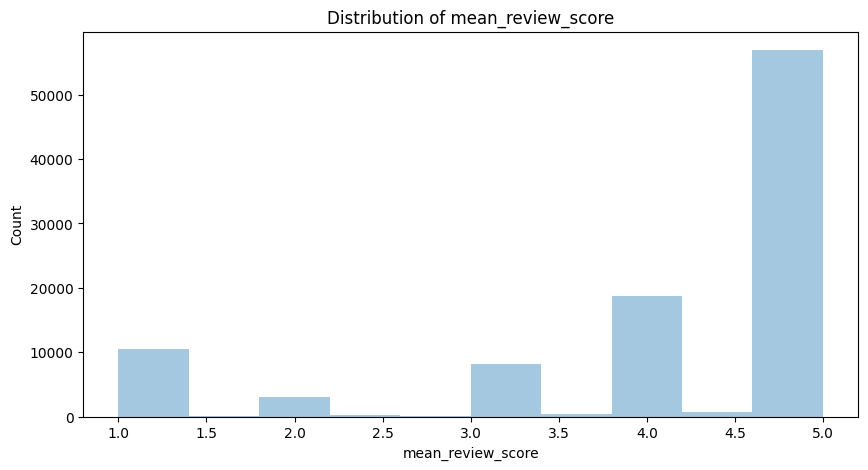

In [45]:
#distribution of mean_review_score
plt.figure(figsize=(10,5))
sns.distplot(df['mean_review_score'], bins=10, kde=False)
plt.title('Distribution of mean_review_score')
plt.xlabel('mean_review_score')
plt.ylabel('Count')
plt.show()

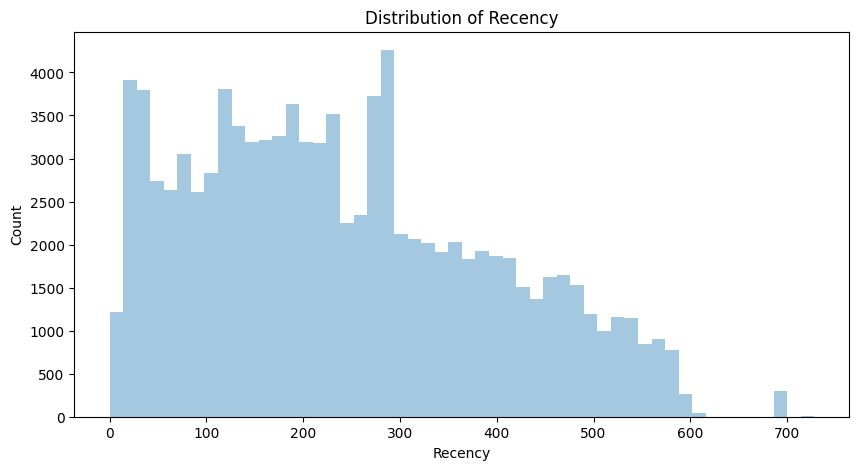

In [46]:
#distribution of recency
plt.figure(figsize=(10,5))
sns.distplot(df['recency'], bins=52, kde=False)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

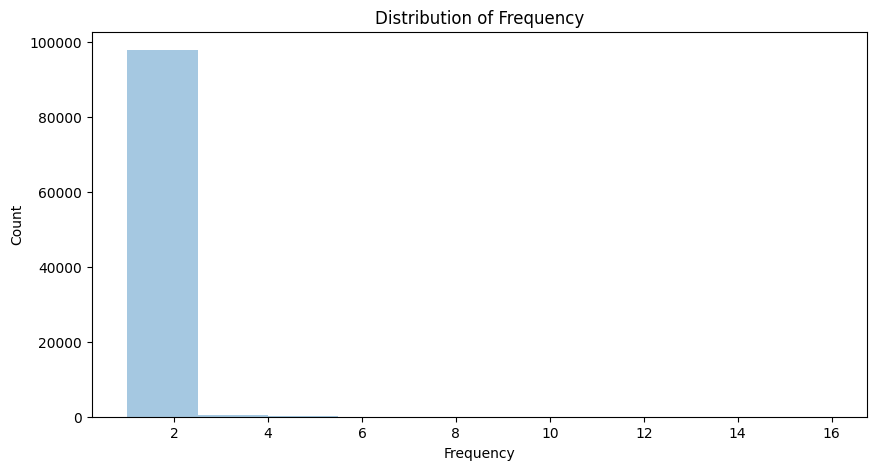

In [47]:
#distribution of frequency
plt.figure(figsize=(10,5))
sns.distplot(df['frequency'], bins=10, kde=False)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

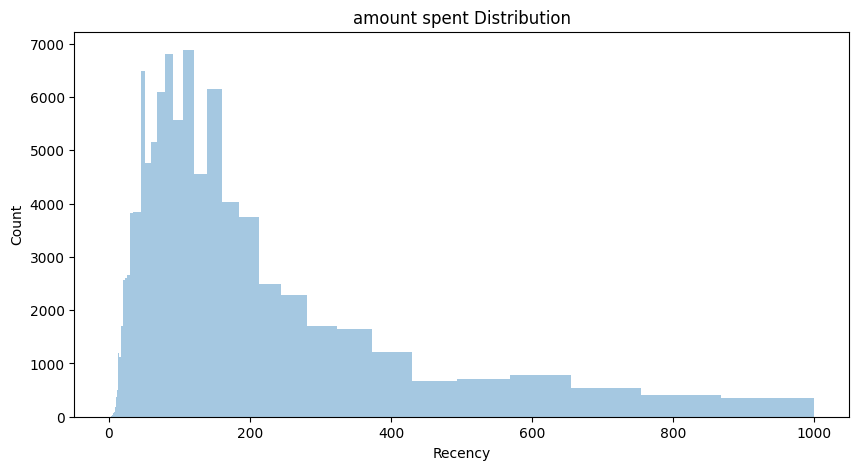

In [48]:
plt.figure(figsize=(10,5))
sns.distplot(df['amount_spent'], bins=np.logspace(0, 3, 50), kde=False)
plt.title('amount spent Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.show()

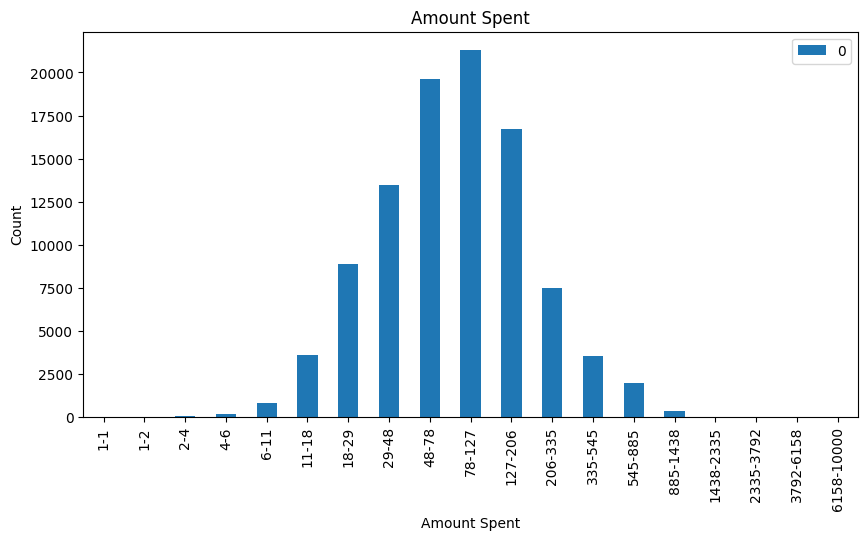

In [49]:
# Créer des intervalles de largeur égale pour les comptes de montants
amount_bins = np.logspace(0, 4, 20)

# Compter le nombre d'occurrences de chaque montant dans chaque intervalle
counts, bin_edges = np.histogram(df.loc[df['amount_spent']<1000, 'amount_spent'], bins=amount_bins)

# Nommer les colonnes du DataFrame des comptes de montants avec les bornes inférieures et supérieures des intervalles
columns = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

# Créer un DataFrame à partir des comptes de montants et des noms de colonnes
counts_df = pd.DataFrame([counts], columns=columns)

#plot amount spent
counts_df.T.plot.bar(figsize=(10,5))
plt.title('Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

In [50]:
df.drop_duplicates(subset=['customer_unique_id'])[['customer_unique_id', 'frequency', 'recency', 'amount_spent', 'mean_review_score']].to_csv('data_2.csv')

In [51]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [52]:
df = data[['customer_id', 'customer_unique_id', 'order_id', 'price', 'order_purchase_timestamp']].copy()

In [53]:
df.shape

(119143, 5)

In [54]:
df.loc[df[['customer_unique_id', 'order_id', 'price']].duplicated()]

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,2017-10-02 10:56:33
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,2017-10-02 10:56:33
12,31ad1d1b63eb9962463f764d4e6e0c9d,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,149.99,2017-07-29 11:55:02
14,494dded5b201313c64ed7f100595b95c,f2a85dec752b8517b5e58a06ff3cd937,e6ce16cb79ec1d90b1da9085a6118aeb,99.00,2017-05-16 19:41:10
24,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,83018ec114eee8641c97e08f7b4e926f,76.00,2017-10-26 15:54:26
...,...,...,...,...,...
119111,609b9fb8cad4fe0c7b376f77c8ab76ad,fb9310710003399b031add3e55f34719,e8fd20068b9f7e6ec07068bb7537f781,356.00,2017-08-10 21:21:07
119131,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,42.11,2017-10-04 19:57:37
119133,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,26.90,2017-10-04 19:57:37
119135,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,370.00,2017-01-27 00:30:03


In [55]:
df.drop_duplicates(subset=['customer_unique_id', 'order_id', 'price'], inplace=True)

In [56]:
df.shape

(102045, 5)

In [57]:
df.loc[df[['order_id']].duplicated()]

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp
33,7e20bf5ca92da68200643bda76c504c6,576ea0cab426cd8a00fad9a9c90a4494,acce194856392f074dbf9dada14d8d82,39.50,2018-06-04 00:00:13
74,81e08b08e5ed4472008030d70327c71f,0e764fc1a13e47e900c3d59a989753e8,688052146432ef8253587b930b01a06d,199.00,2018-04-22 08:48:13
146,fac60d7c4df3896a5af5db6c91e03797,c53e944da3d3ad66ccb7527165b78681,f2fa3795760c35b8c05fa8e2f09d5143,119.99,2018-03-31 14:20:46
147,fac60d7c4df3896a5af5db6c91e03797,c53e944da3d3ad66ccb7527165b78681,f2fa3795760c35b8c05fa8e2f09d5143,149.99,2018-03-31 14:20:46
173,167b9485947ed0a354a3f8dad04eb199,548a09978548d2e347d494793e34c797,f4471dae8c482f51aa1826cd9f5d4433,110.32,2018-07-05 18:40:47
...,...,...,...,...,...
118870,958e287b02a53d2107c61ec4ac90943e,9c83f21126fe233bad5a62397cbc77aa,f73a22bddb155350e16a991b2510fa64,180.00,2018-03-08 07:26:51
118904,243710cf3eaa735289510feca045b51c,4e8e4cf271d32d5e8a3f9de8dc44d515,356f68057b81e3a00ee64a8e16051517,134.90,2017-10-03 13:17:00
119028,723b22c2412b366d01cdc84ee4295fc2,18d80539b48782943ec71ac9ce327aaf,a281208da836ef2c9d23718a7a855a92,100.00,2018-08-22 14:53:45
119061,a14f464b2a19d761f7f3f0885d5ea955,888af42530e7523201a4326273a7b35c,dbd4cbb492a12b99c5224014930acc18,37.40,2017-03-26 14:12:46


In [58]:
df.drop_duplicates(subset=['order_id'], inplace=True)

In [59]:
df.loc[df[['order_id']].duplicated()]

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp


In [60]:
#delete nan values of price
df.dropna(subset=['price'], inplace=True)

In [61]:
#save to csv
df.to_csv('data.csv')

In [62]:
df.loc[df["customer_unique_id"] == 'b7d76e111c89f7ebf14761390f0f7d17']

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp
5359,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,39.99,2016-09-04 21:15:19


In [63]:
df.head()

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,2017-10-02 10:56:33
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70,2018-07-24 20:41:37
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90,2018-08-08 08:38:49
5,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00,2017-11-18 19:28:06
6,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90,2018-02-13 21:18:39


In [64]:
#separate data for each week
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['week'] = df['order_purchase_timestamp'].dt.week

In [65]:
df.head()

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp,week
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,2017-10-02 10:56:33,40
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70,2018-07-24 20:41:37,30
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90,2018-08-08 08:38:49,32
5,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00,2017-11-18 19:28:06,46
6,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90,2018-02-13 21:18:39,7


In [66]:
df['week'].value_counts()

31    3025
47    2979
32    2899
33    2895
20    2771
19    2761
29    2625
30    2564
18    2543
9     2375
12    2353
17    2345
23    2270
24    2262
16    2235
10    2211
11    2204
14    2171
8     2125
26    2118
25    2116
6     2103
48    2078
5     2047
13    2029
7     2024
27    2014
15    1995
34    1943
28    1942
4     1934
3     1931
22    1908
2     1850
21    1727
49    1662
1     1418
50    1398
46    1293
40    1260
45    1200
37    1158
42    1129
35    1122
41    1091
38     981
51     973
43     966
39     952
44     921
36     897
52     873
Name: week, dtype: int64

In [67]:
data_week = {}
for i in range(1, 53):
    data_week[i] = df.loc[df['week']<=i]

In [68]:
data_week[1]

,customer_id,customer_unique_id,order_id,price,order_purchase_timestamp,week
20,738b086814c6fcc74b8cc583f8516ee3,6e26bbeaa107ec34112c64e1ee31c0f5,403b97836b0c04a622354cf531062e5f,1299.00,2018-01-02 19:00:43,1
75,5dda11942d4f77bee3a46d71e442aec4,6a0e43f0d7e1b5539e4c58a26ebe35da,f271576bed568e896f99eb710cd3a6f8,329.90,2018-01-07 21:44:54,1
283,a4555d257db29ef5f838cec4101c5208,f7be9bec658c62ab6240b44cd26c0b84,f175d67589e059cbbda956f10f0702e6,9.90,2017-01-05 13:34:35,1
392,a9c9532060c9d245f06526c633d2dfba,5f38cc36e507c4d880489be38964af19,6f841dde94727854eaff3f66432c80ea,168.90,2018-01-02 19:20:35,1
395,993a76ab0714792eb45d4ebdd58e9a1c,773d6a126278eaa169f2daeb9cc23ef9,3d087f98b006ae162b5e3b56e7bfdb4a,55.00,2018-01-05 11:04:11,1
...,...,...,...,...,...,...
118707,92fc29e76e4da7c1b189ab092d4c3756,8901b2526349d372dd0bdf8d77af656d,dbfa3d8c05cc5d84083fc259a9feb5bc,129.90,2018-01-04 22:57:14,1
118730,bbaae092a3ff8f60678b288009bbbfe1,4294734b451b175e3f9edcaa4afa38af,dcd7ba3b58ccb67686e71ad6439ee17a,199.00,2018-01-02 16:11:58,1
118936,18a0915969a15a6ef74faae25f0838af,5dd80be6e0ba0572623fecd64ca7b73c,0aac3f6d27bb6ca9544b436813cec8aa,129.99,2018-01-02 21:22:55,1
118995,b4cd0522e632e481f8eaf766a2646e86,965191786b70912f793e4a777fd623cd,e9e64a17afa9653aacf2616d94c005b8,129.90,2018-01-05 23:07:24,1


In [69]:
for i in range(1, 53):
    data_week[i]['amount_spent'] = data_week[i].groupby('customer_unique_id')['price'].apply('sum')